<b> Importing necessary libraries and warnings </b>

In [288]:
#Importing libraries.
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import os
import warnings
warnings.filterwarnings('ignore')

<b> Reading data files to a .csv file and creating dataframes </b>

In [289]:
#Reading data files from the system.
Cars = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\cars_trucks_and_buses_per_1000_persons.csv")
Electuse = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\electricity_use_per_person.csv")
Hydro = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\hydro_power_generation_per_person.csv")
Income = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
Ind = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\industry_percent_of_gdp.csv")
Oilcon = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\oil_consumption_per_cap.csv")
Oilprod = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\oil_production_per_person.csv")
Co2emm = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\yearly_co2_emissions_1000_tonnes.csv")
Ngas = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\natural_gas_production_per_person.csv")
Forest =pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\forest_coverage_percent.csv")
Co2 = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\co2_emissions_tonnes_per_person.csv")
Coal = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\coal_consumption_per_cap.csv")
Electgen = pd.read_csv(r"C:\Users\Helenasec\Desktop\CU\SEM-5\Case Study Python\co2_prediction dataset\co2_prediction\electricity_generation_per_person.csv")

<b> Altering dataframes to contain only attributes:'geo' and '2014' </b>

In [290]:
#Altering dataframes.
Cars = Cars['geo']
Electuse = Electuse[['geo','2014']]
Hydro = Hydro['geo']
Income = Income[['geo','2014']]
Ind = Ind[['geo','2014']][['geo','2014']]
Oilcon = Oilcon[['geo','2014']]
Oilprod = Oilprod[['geo','2014']]
Co2emm = Co2emm[['geo','2014']]
Forest = Forest[['geo','2014']]
Co2 = Co2[['geo','2014']]
Coal= Coal[['geo','2014']]
Electgen = Electgen[['geo','2014']]

<b> Renaming column in all dataframes with '2014' as an attribute </b>

In [291]:
#Renaming dataframe's column using '.rename' function.
Electuse.rename(columns = {'2014':'elecdata'}, inplace = True)
Co2emm.rename(columns = {'2014':'co2emdata'}, inplace = True)
Income.rename(columns = {'2014':'incdata'}, inplace = True)
Ind.rename(columns = {'2014':'inddata'}, inplace = True)
Oilcon.rename(columns = {'2014':'oilcdata'}, inplace = True)
Oilprod.rename(columns = {'2014':'oilpdata'}, inplace = True)
Forest.rename(columns = {'2014':'forest'}, inplace = True)
Co2.rename(columns = {'2014':'co2data'}, inplace = True)
Coal.rename(columns = {'2014':'coaldata'}, inplace = True)
Electgen.rename(columns = {'2014':'egdata'}, inplace = True)

<b> Merging all dataframes via 'Outer Join' on 'geo' </b>

In [292]:
#Merging datframes using '.merge' function.
A = pd.merge(Cars,Co2,how= 'outer', on='geo')
B = pd.merge(A,Coal,how= 'outer', on='geo')
C = pd.merge(B,Electgen,how= 'outer', on='geo')
D = pd.merge(C,Electuse,how= 'outer', on='geo')
E = pd.merge(D,Hydro,how= 'outer', on='geo')
F = pd.merge(E,Income,how= 'outer', on='geo')
G = pd.merge(F,Ind,how= 'outer', on='geo')
H = pd.merge(G,Oilcon,how= 'outer', on='geo')
I = pd.merge(H,Oilprod,how= 'outer', on='geo')
J = pd.merge(I,Forest,how='outer', on= 'geo')
df=pd.merge(J,Co2emm,how= 'outer', on='geo')
#Returning the dataframe 'df'.
df.head()

,geo,co2data,coaldata,egdata,elecdata,incdata,inddata,oilcdata,oilpdata,forest,co2emdata
0,Afghanistan,0.299,NaN,NaN,NaN,1780.0,21.1,NaN,NaN,2.07,9810.0
1,Albania,1.960,NaN,NaN,2310.0,10700.0,21.5,NaN,NaN,28.20,5720.0
2,Algeria,3.720,0.00458,1640.0,1360.0,13500.0,42.3,0.452,1.760,0.82,145000.0
3,Angola,1.290,NaN,NaN,312.0,6260.0,NaN,NaN,3.080,46.50,34800.0
4,Argentina,4.750,0.03460,3290.0,3050.0,18800.0,24.3,0.729,0.695,10.00,204000.0


<b> Data Cleaning </b>

In [293]:
#Returning basic info about dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   geo        194 non-null    object 
 1   co2data    192 non-null    float64
 2   coaldata   65 non-null     float64
 3   egdata     65 non-null     float64
 4   elecdata   137 non-null    float64
 5   incdata    193 non-null    float64
 6   inddata    183 non-null    float64
 7   oilcdata   65 non-null     float64
 8   oilpdata   49 non-null     float64
 9   forest     191 non-null    float64
 10  co2emdata  192 non-null    float64
dtypes: float64(10), object(1)
memory usage: 18.2+ KB


In [294]:
#Counting the number of values in 'df'.
df['geo'].value_counts().sum()

194

In [295]:
#Returning total null/missing values in 'df'.
df.isnull().sum()

geo            0
co2data        2
coaldata     129
egdata       129
elecdata      57
incdata        1
inddata       11
oilcdata     129
oilpdata     145
forest         3
co2emdata      2
dtype: int64

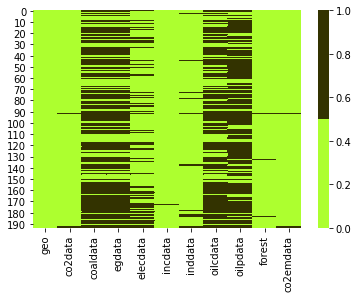

In [296]:
#Returning/visualising total null/missing values in 'df'.
#First 30 columns.
cols = df.columns[:30] 
#Green missing value,Brown not missing.
colours = ['#ADFF2F', '#333300'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

<b> Dropping columns  'coaldata', 'egdata', 'oilcdata', 'oilpdata' as they have a number of null values </b>

In [297]:
#Dropping unnecessary columns and filling other column's null values with the 'mean'.
df = df.drop(['coaldata','egdata','oilcdata','oilpdata'], axis=1)
df['co2data'].fillna(value = (df['co2data'].mean()), inplace=True)
df['incdata'].fillna(value = (df['incdata'].mean()), inplace=True)
df['co2emdata'].fillna(value = (df['co2emdata'].mean()), inplace=True)
df['elecdata'].fillna(value = (df['elecdata'].mean()), inplace=True)
df['inddata'].fillna(value = (df['inddata'].mean()), inplace=True)
df['forest'].fillna(value = (df['forest'].mean()), inplace=True)

#Checking for null values now.
df.isnull().sum()

geo          0
co2data      0
elecdata     0
incdata      0
inddata      0
forest       0
co2emdata    0
dtype: int64

<b> Data Visualization </b>

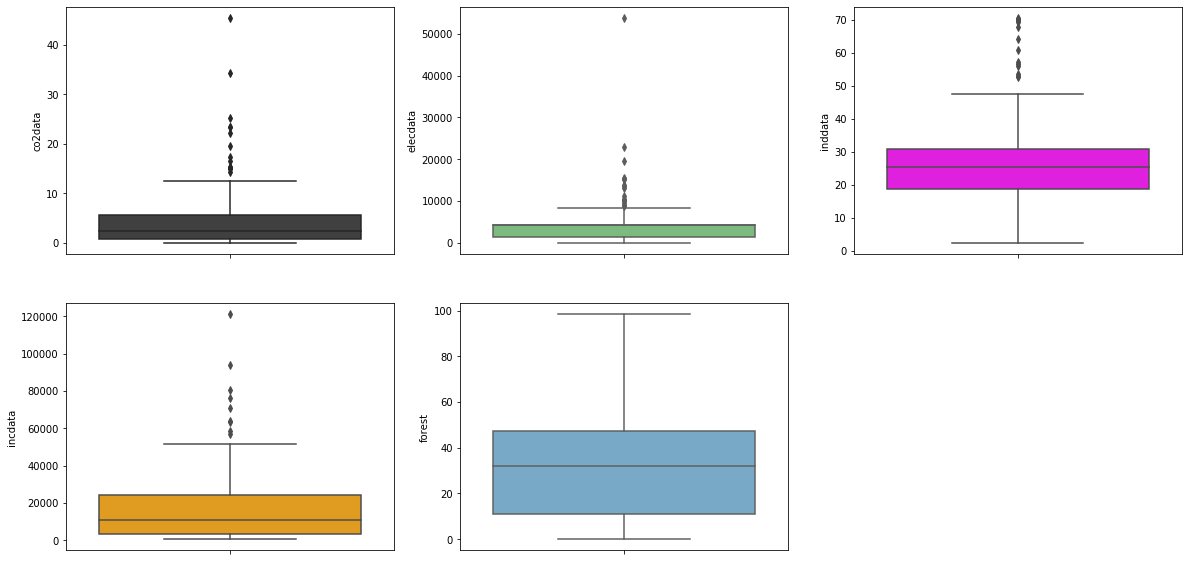

In [298]:
#Plotting boxplots.
plt.figure(figsize=(20, 10))

plt.subplot(2,3,1)
sns.boxplot(y= 'co2data', data = df, color="0.25")

plt.subplot(2,3,2)
sns.boxplot(y= 'elecdata', data = df, palette="Greens")

plt.subplot(2,3,3)
sns.boxplot(y = 'inddata', data = df, color="Magenta")

plt.subplot(2,3,4)
sns.boxplot(y= 'incdata', data = df, color="Orange")


plt.subplot(2,3,5)
sns.boxplot(y = 'forest',  data = df, palette="Blues")

#Returning the plots.
plt.show()

In [299]:
#Getting rid of outliers.
df=df[(df.incdata<8000)]
df=df[df['co2data']<26]
df=df[df['elecdata']<22000]
df=df[df['inddata']<67]

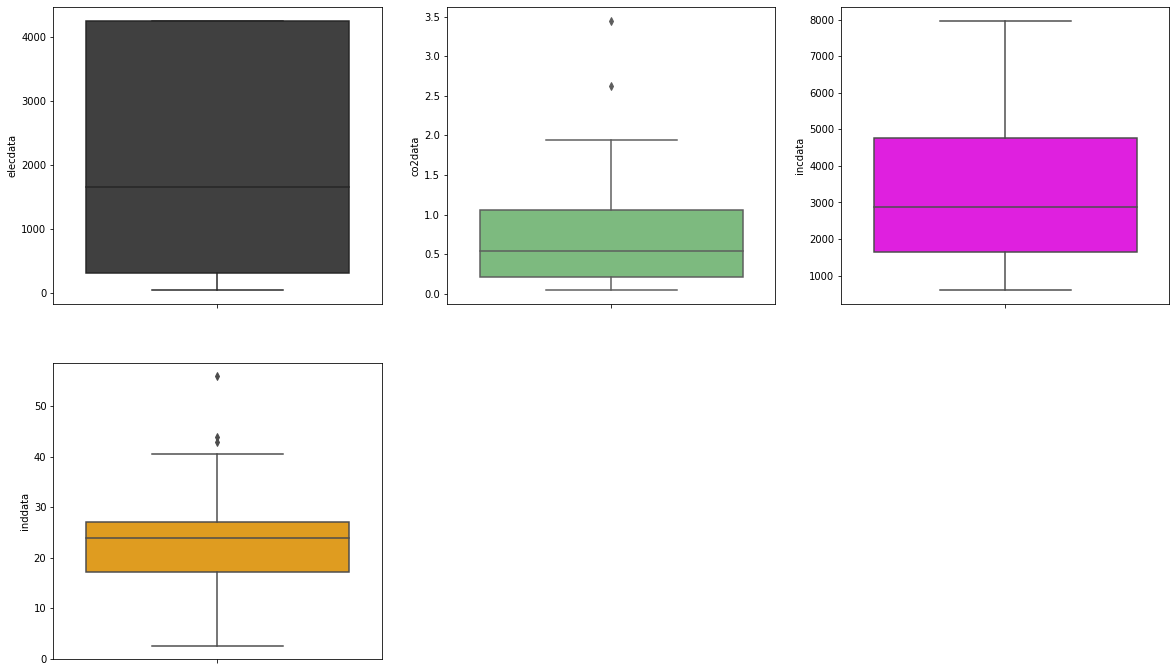

In [300]:
#Plotting boxplots.
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(y= 'elecdata', data = df, color="0.25")

plt.subplot(2,3,2)
sns.boxplot(y= 'co2data', data = df, palette="Greens")

plt.subplot(2,3,3)
sns.boxplot(y= 'incdata', data = df, color="Magenta")

plt.subplot(2,3,4)
sns.boxplot(y = 'inddata', data = df, color="Orange")

#Returning the plot.
plt.show()

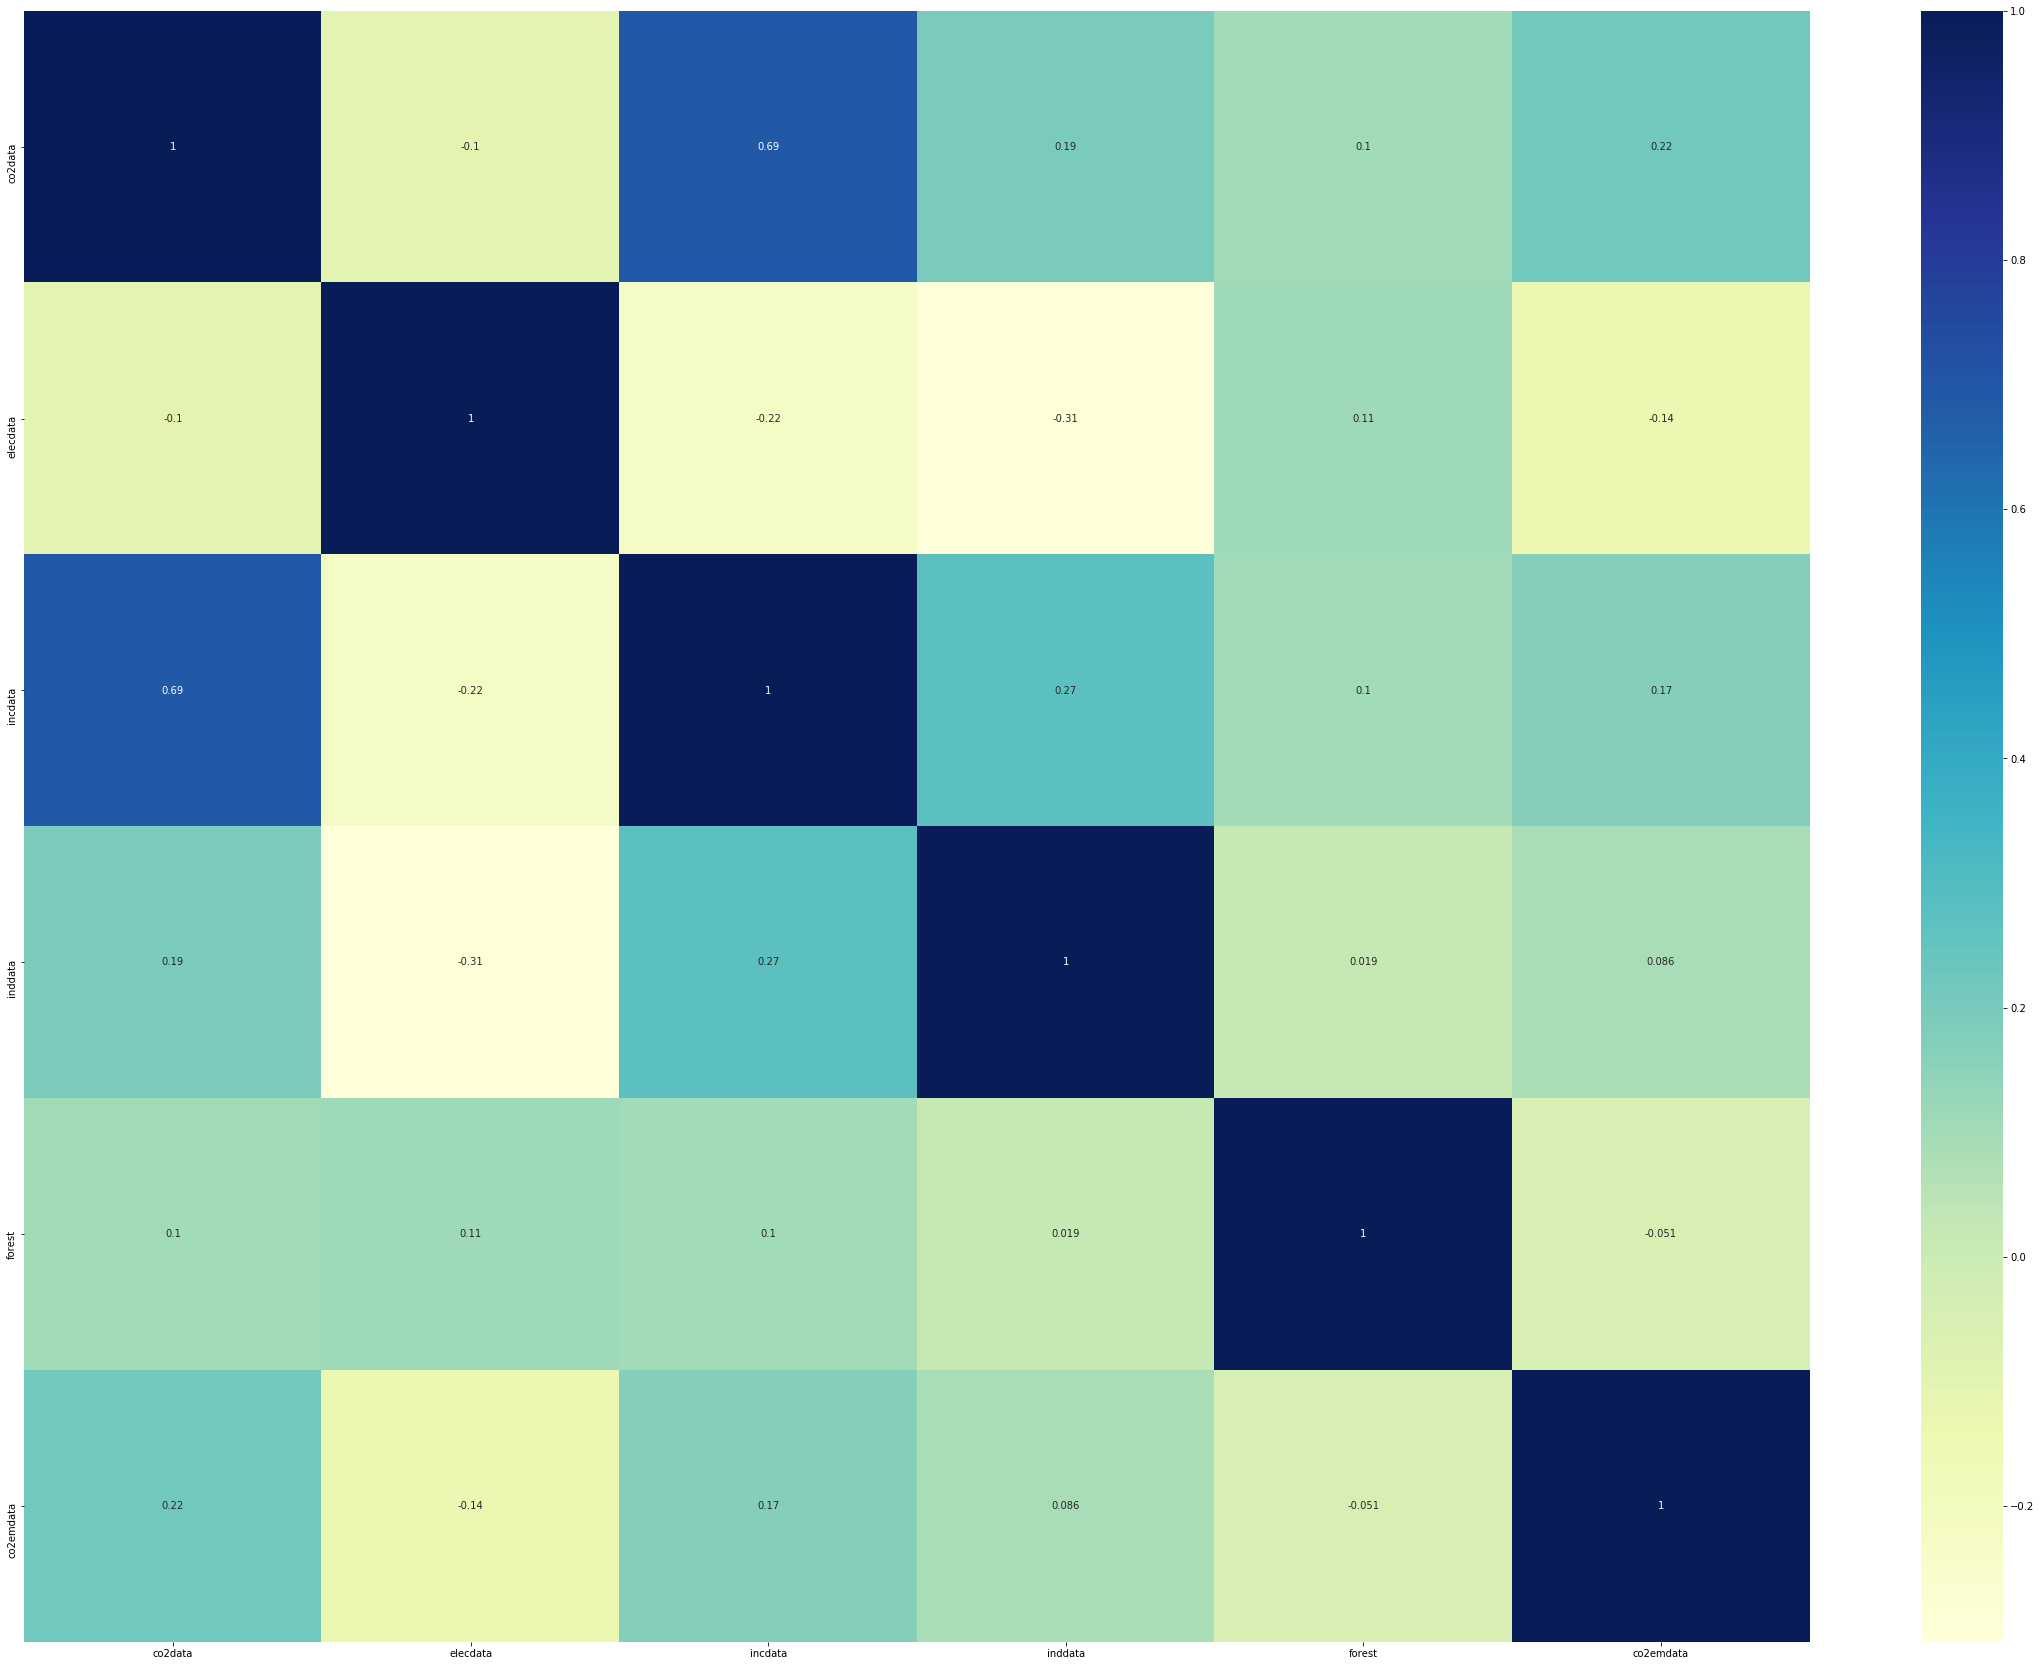

In [301]:
#Plotting a heatmap.
plt.figure(figsize = (40,30))
#Using '.corr' to find the relationship between the attributes.
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [302]:
print("No such any multicollienarity exists as the precitor variables are slightly corelated to the target variable 'co2data'.")

No such any multicollienarity exists as the precitor variables are slightly corelated to the target variable 'co2data'.


<b> Data Preparation </b>

In [303]:
#Splitting data into independent and target variables.
x= df.drop(['co2data','geo'], axis=1)
y=df['co2data']

In [304]:
#Scaling the features.
from sklearn.preprocessing import scale

cols = x.columns
x = pd.DataFrame(scale(x))
x.columns = cols
x.columns

Index(['elecdata', 'incdata', 'inddata', 'forest', 'co2emdata'], dtype='object')

In [305]:
#Splitting into testing and training datasets for model building.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size = 0.3, random_state=100)

<b> Model Building </b>

<b> Ridge Regression </b>

In [306]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

#Cross Validation.
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True,verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [307]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002343,0.000781,0.000780,0.000390,0.0001,{'alpha': 0.0001},-0.251858,-0.405570,-0.391999,-0.475572,...,-0.363844,0.080504,24,-0.330066,-0.305127,-0.302497,-0.270304,-0.308846,-0.303368,0.019183
1,0.001757,0.000390,0.000781,0.000390,0.001,{'alpha': 0.001},-0.251599,-0.405014,-0.391708,-0.475483,...,-0.363614,0.080466,23,-0.330030,-0.305059,-0.302477,-0.270305,-0.308801,-0.303334,0.019169
2,0.001374,0.000471,0.000584,0.000477,0.01,{'alpha': 0.01},-0.249110,-0.399730,-0.388920,-0.474650,...,-0.361424,0.080136,22,-0.329688,-0.304410,-0.302292,-0.270308,-0.308365,-0.303013,0.019038
3,0.001170,0.000389,0.000782,0.000391,0.05,{'alpha': 0.05},-0.242654,-0.381077,-0.378743,-0.471852,...,-0.354135,0.078684,21,-0.328408,-0.302272,-0.303305,-0.270316,-0.306753,-0.302211,0.018576
4,0.001360,0.000484,0.000596,0.000487,0.1,{'alpha': 0.1},-0.239261,-0.365032,-0.369520,-0.469623,...,-0.348263,0.077307,19,-0.327206,-0.302169,-0.304531,-0.270316,-0.305275,-0.301899,0.018201


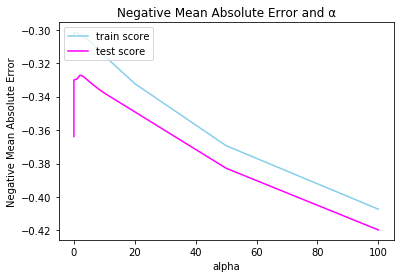

In [308]:
#Plotting mean test and train scoes with α. 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

#Plotting plots.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='Skyblue')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='Magenta')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and α")
plt.legend(['train score', 'test score'], loc='upper left')

#returning plots.
plt.show()

In [309]:
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.03360434,  0.42080713, -0.02150882,  0.03776947,  0.09017913])

<b> Lasso Regression </b>

In [310]:
lasso = Lasso()

#Cross Validation.
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            

#Fitting the model.
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [311]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002335,0.000470,0.000976,0.000617,0.0001,{'alpha': 0.0001},-0.251459,-0.404985,-0.391489,-0.474728,...,-0.363397,0.080268,6,-0.329979,-0.305035,-0.302473,-0.270290,-0.308748,-0.303305,0.019156
1,0.001764,0.000395,0.000773,0.000387,0.001,{'alpha': 0.001},-0.247614,-0.399165,-0.386606,-0.467046,...,-0.359141,0.078124,4,-0.329158,-0.304140,-0.302386,-0.270158,-0.307820,-0.302732,0.018907
2,0.001757,0.000391,0.000584,0.000477,0.01,{'alpha': 0.01},-0.231661,-0.341344,-0.340337,-0.458924,...,-0.336279,0.073165,3,-0.322114,-0.301205,-0.307525,-0.268330,-0.300067,-0.299848,0.017607
3,0.001561,0.000479,0.000585,0.000478,0.05,{'alpha': 0.05},-0.241387,-0.302189,-0.309407,-0.466706,...,-0.324689,0.075214,1,-0.330037,-0.311187,-0.310500,-0.269744,-0.302656,-0.304825,0.019716
4,0.001172,0.000390,0.000781,0.000390,0.1,{'alpha': 0.1},-0.263359,-0.300385,-0.302997,-0.486164,...,-0.332630,0.078473,2,-0.338269,-0.321303,-0.321160,-0.283199,-0.315730,-0.315932,0.018037


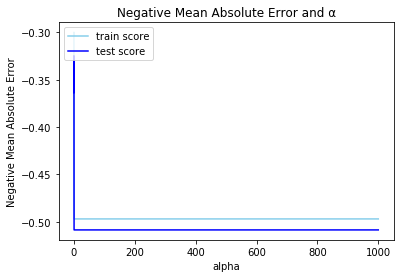

In [312]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

#Plotting plots.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='Skyblue')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='Blue')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and α")
plt.legend(['train score', 'test score'], loc='upper left')

#Returning the plots.
plt.show()

In [313]:
alpha =10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [314]:
print("The variables: 'elecdata', 'incdata', 'inddata', 'forest', 'co2emdata' contributed the most")

The variables: 'elecdata', 'incdata', 'inddata', 'forest', 'co2emdata' contributed the most
